# Display results of analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('../results/summary.csv')
df = df.set_index('name')
df

,total_words,distinct_words,alpha,C
name,,,,
dracula,160664,10616,1.086088,6.969854
frankenstein,78024,7541,1.114925,6.168187
jane_eyre,185390,17498,0.970275,11.911447


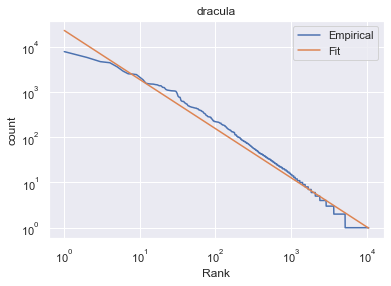

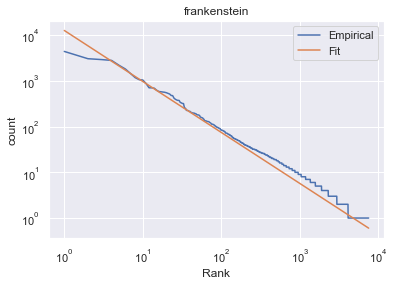

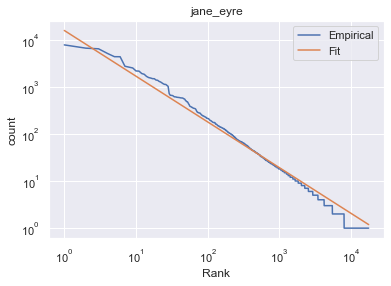

In [2]:
most_common = {}
for book, row in df.iterrows():
    plt.figure()
    df_c = pd.read_csv(f'../results/raw_counts/{book}.csv')
    rank = np.arange(df_c.shape[0]) + 1
    plt.loglog(rank, df_c.freq)
    plt.loglog(rank, df_c.freq.sum() / row.C * rank ** (-row.alpha) )
    plt.xlabel('Rank')
    plt.ylabel('count')
    plt.title(book)
    plt.legend(['Empirical', 'Fit'])
    plt.show()
    most_common[book] = df_c.word[:10].values

In [3]:
# Show most common words for each text
pd.DataFrame(most_common)

,dracula,frankenstein,jane_eyre
0,the,the,the
1,and,and,i
2,i,i,and
3,to,of,to
4,of,to,of
5,a,my,a
6,he,a,in
7,in,in,you
8,that,was,was
9,it,that,my
